In [12]:
from collections import defaultdict

class PriorityQueue():
    def swap_node_idxs_in_map(self, n_1, n_2):
        temp = self.node_to_idx[n_1]
        self.node_to_idx[n_1] = self.node_to_idx[n_2]
        self.node_to_idx[n_2] = temp
        
    def swap(self, i, j):
        temp = self.H[i]
        self.H[i] = self.H[j]
        self.H[j] = temp
        self.swap_node_idxs_in_map(self.H[i][0], self.H[j][0])
        
    def max_heapify(self, i):
        l = 2*i + 1
        r = 2*i + 2
        largest = i
        
        if(l<self.heap_size and self.H[l][1]>self.H[largest][1]):
            largest = l
        
        if(r<self.heap_size and self.H[r][1]>self.H[largest][1]):
            largest = r
            
        if(largest != i):
            self.swap(i, largest)
            self.max_heapify(largest)
        return    
        
    def build_heap(self):
        for i in reversed(range(self.heap_size//2)):
            self.max_heapify(i)
    
    def extract_max(self):
        self.swap(0, self.heap_size-1)
        self.heap_size -= 1
        self.max_heapify(0)
        return self.H[self.heap_size][0]
    
    def increase_key(self, v, updated_key):
        i = self.node_to_idx[v]
        self.H[i] = (v, updated_key)
        
        p = (i-1)//2
        while(p>=0 and self.H[i][1]>self.H[p][1]):
            self.swap(i, p)
            i = p
            p = (i-1)//2
            
    def __init__(self, keys_dict):
        self.node_to_idx = dict()
        self.heap_size = len(keys_dict)
        self.H = []
        i=0
        for n in keys_dict:
            self.H.append((n, keys_dict[n]))
            self.node_to_idx[n] = i
            i += 1      
        self.build_heap()

def BFS_visit(Q, t, adj_list_f, c_f, visited, predecessor):    
    while(len(Q)):
        if(visited[t]):
            break

        u = Q.pop(0)
        visited[u] = True
        for v in adj_list_f[u]:
            if(not visited[t] and not visited[v] and c_f[(u,v)]>0):
                Q.append(v)
                predecessor[v] = u

def get_bottleneck_and_path(s, t, predecessor, c_f):
    path = []
    b = 0
    if(predecessor[t]!=None):
        path.append(t)
        b = c_f[(predecessor[t], t)]
        while(predecessor[path[-1]]!=None):
            path.append(predecessor[path[-1]])          
            e_c = c_f[(path[-1], path[-2])]
            if(b>e_c):
                b = e_c
                
    if(len(path) and path[-1]==s):
        path.reverse()
    
    return b, path
    
def BFS(s, t, adj_list_f, c_f): 
    predecessor = dict()
    visited = dict()
    Q = []
    
    for n in adj_list_f:
        visited[n] = False
        predecessor[n] = None
    
    Q.append(s)
    BFS_visit(Q, t, adj_list_f, c_f, visited, predecessor)
    
    return get_bottleneck_and_path(s, t, predecessor, c_f)

def get_res_flow_in_G(c, flow):
    res_flow = []
    for u,v in c:
        if(flow[(u,v)] > 0):
            res_flow.append((u,v,flow[(u,v)]))
    
    return res_flow

def decrease_capacity(c_f, u, v, b, adj_list_f):
    c_f[(u,v)] -= b
    if(c_f[(u,v)]==0):
        del c_f[(u,v)]
        adj_list_f[u].remove(v)
    
def decrease_flow(flow, u, v, b):
    if(flow[(u,v)]):
        flow[(u,v)] -= b
        if(flow[(u,v)]==0):
            del flow[(u,v)]
        
def update_capacity_and_flow_in_Gf(c_f, flow, path, b, adj_list_f):
    for i in range(len(path)-1):
        decrease_capacity(c_f, path[i], path[i+1], b, adj_list_f)
        flow[(path[i], path[i+1])] += b
        decrease_flow(flow, path[i+1], path[i], b)
        c_f[(path[i+1], path[i])] +=b
        adj_list_f[path[i+1]].add(path[i])
            
def Max_Flow_Short(s, t, capacities):
    adj_list = defaultdict(lambda: set())
    c = defaultdict(lambda:0)
    flow = defaultdict(lambda:0)
    max_flow = 0
    
    for tup in capacities:
        c[(tup[0], tup[1])] = tup[2]
        flow[(tup[0], tup[1])] = 0
        adj_list[tup[0]].add(tup[1])
        if(tup[1] not in adj_list):
            adj_list[tup[1]]
            
    adj_list_f = adj_list.copy() 
    c_f = c.copy()
    
    b, path = BFS(s, t, adj_list_f, c_f)
    max_flow += b
    while(path!=[]):   
        update_capacity_and_flow_in_Gf(c_f, flow, path, b, adj_list_f)        
        b, path = BFS(s, t, adj_list_f, c_f)
        max_flow += b
        
    return (max_flow, get_res_flow_in_G(c, flow))

In [10]:
#Max_Flow_Short(0, 3, [(0,1,1), (0,2,5), (1,2,1), (2,3,2), (1,3,6)])

(3, [(0, 1, 1), (0, 2, 2), (2, 3, 2), (1, 3, 1)])

In [11]:
#Max_Flow_Short(0, 4,  [(0, 1, 2), (0, 3, 6), (1, 2, 3), (1, 3, 8), (1, 4, 5), (2, 4, 7), (3, 4, 9)])

(8, [(0, 1, 2), (0, 3, 6), (1, 4, 2), (3, 4, 6)])

In [5]:
def is_decendant_of_s(s, n, predecessor):
    if(s==n):
        return True
    temp = int(n)
    while(predecessor[temp]!=None and predecessor[temp]!=s):
        temp = predecessor[temp]
    return predecessor[temp]==s   
    

def MST_Prim(s, t, adj_list_f, c_f):     
    keys_dict = defaultdict(lambda: -1)
    predecessor = defaultdict(lambda:None)
    node_in_Q = dict()
    
    for n in adj_list_f:
        keys_dict[n]
        predecessor[n]
        node_in_Q[n] = 1
    
    keys_dict[s] = 0
    Q = PriorityQueue(keys_dict)
    
    while(predecessor[t]==None and Q.heap_size!=0):
        u = Q.extract_max()
        node_in_Q[u] = 0
        
        if(is_decendant_of_s(s, u, predecessor)):
            for v in adj_list_f[u]:
                if(predecessor[t]!=None):
                    break

                if(node_in_Q[v] and c_f[(u, v)]>keys_dict[v] and c_f[(u, v)]):
                    predecessor[v] = u
                    keys_dict[v] = c_f[(u, v)]
                    Q.increase_key(v, c_f[(u, v)])
                    
    return get_bottleneck_and_path(s, t, predecessor, c_f)        


def Max_Flow_Fat(s, t, capacities):
    adj_list = defaultdict(lambda: set())
    c = defaultdict(lambda:0)
    flow = defaultdict(lambda:0)
    max_flow = 0
    
    for tup in capacities:
        c[(tup[0], tup[1])] = tup[2]
        flow[(tup[0], tup[1])] = 0
        adj_list[tup[0]].add(tup[1])
        if(tup[1] not in adj_list):
            adj_list[tup[1]]
                  
    adj_list_f = adj_list.copy() 
    c_f = c.copy()
    
    b, path = MST_Prim(s, t, adj_list_f, c_f)
    max_flow += b
    while(path!=[]):  
        update_capacity_and_flow_in_Gf(c_f, flow, path, b, adj_list_f)        
        b, path = MST_Prim(s, t, adj_list_f, c_f)
        max_flow += b
        
    return (max_flow, get_res_flow_in_G(c, flow))

In [6]:
caps = [(0,1,1), (0,2,5), (1,2,1), (2,3,2), (1,3,6)]
Max_Flow_Fat(0, 3, caps)

(3, [(0, 1, 1), (0, 2, 2), (2, 3, 2), (1, 3, 1)])

In [7]:
Max_Flow_Fat(0, 4,  [(0, 1, 2), (0, 3, 6), (1, 2, 3), (1, 3, 8), (1, 4, 5), (2, 4, 7), (3, 4, 9)])

(8, [(0, 1, 2), (0, 3, 6), (1, 4, 2), (3, 4, 6)])

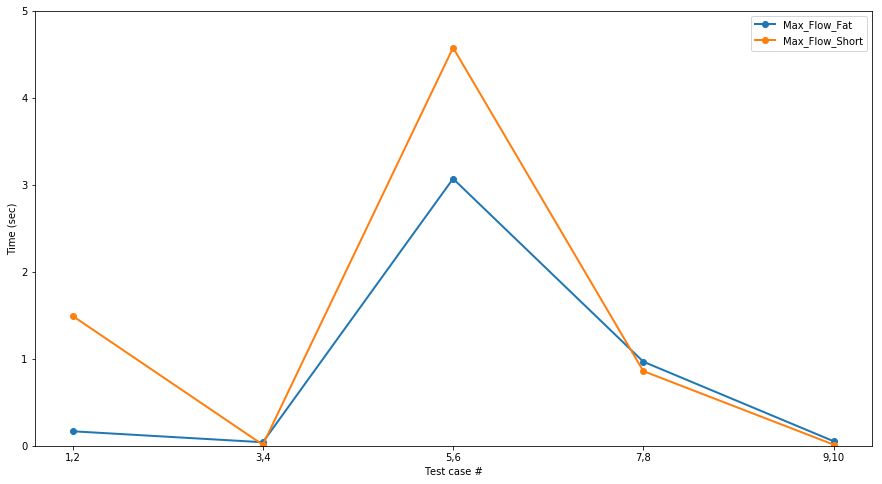

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
ax = plt.subplot(111)


t = ['1,2','3,4', '5,6', '7,8', '9,10']

fat = [
    0.167,
    0.041,
    3.071,
    0.967,
    0.053]

short = [
    1.493,
    0.012,
    4.577,
    0.859,
    0.014]

line, = plt.plot(t, fat, lw=2, marker='o', label="Max_Flow_Fat")
line2, = plt.plot(t, short, lw=2, marker='o', label="Max_Flow_Short")

plt.ylim(0,5)
plt.ylabel('Time (sec)')
plt.xlabel('Test case #')
plt.xticks(t)
plt.legend()
plt.show()